In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("../VOCDev.csv", dtype={"imagename": str})
df

,imageset,imagename,imagewidth,imageheight,class,difficulty,pose,truncated,xmin,xmax,ymin,ymax
0,train,000012,500,333,car,0,Rear,0,156,351,97,270
1,train,000017,480,364,person,0,Left,0,185,279,62,199
2,train,000017,480,364,horse,0,Left,0,90,403,78,336
3,train,000023,334,500,bicycle,0,Unspecified,1,9,245,230,500
4,train,000023,334,500,bicycle,0,Frontal,1,230,334,220,500
...,...,...,...,...,...,...,...,...,...,...,...,...
15657,val,009958,500,333,person,0,Rear,0,344,444,106,298
15658,val,009958,500,333,person,0,Frontal,0,148,213,108,187
15659,val,009958,500,333,person,0,Unspecified,0,89,149,27,217
15660,val,009958,500,333,person,0,Unspecified,0,75,147,39,124


In [27]:
desired_classes = ['person', 'car', 'bicycle', 'train', 'motorbike', 'bus']
df = df[df['class'].isin(desired_classes)]
df

,imageset,imagename,imagewidth,imageheight,class,difficulty,pose,truncated,xmin,xmax,ymin,ymax
0,train,000012,500,333,car,0,Rear,0,156,351,97,270
1,train,000017,480,364,person,0,Left,0,185,279,62,199
3,train,000023,334,500,bicycle,0,Unspecified,1,9,245,230,500
4,train,000023,334,500,bicycle,0,Frontal,1,230,334,220,500
5,train,000023,334,500,bicycle,1,Unspecified,1,2,90,178,500
...,...,...,...,...,...,...,...,...,...,...,...,...
15657,val,009958,500,333,person,0,Rear,0,344,444,106,298
15658,val,009958,500,333,person,0,Frontal,0,148,213,108,187
15659,val,009958,500,333,person,0,Unspecified,0,89,149,27,217
15660,val,009958,500,333,person,0,Unspecified,0,75,147,39,124


imageset        train
imagename      000026
imagewidth        500
imageheight       333
class             car
difficulty          0
pose            Right
truncated           0
xmin               90
xmax              337
ymin              125
ymax              212
Name: 9, dtype: object
/Users/davidphan/Documents/CSS2-People-and-Vehicle-Recognition/Datasets/VOC2007_TrainVal/JPEGImages/000026.jpg


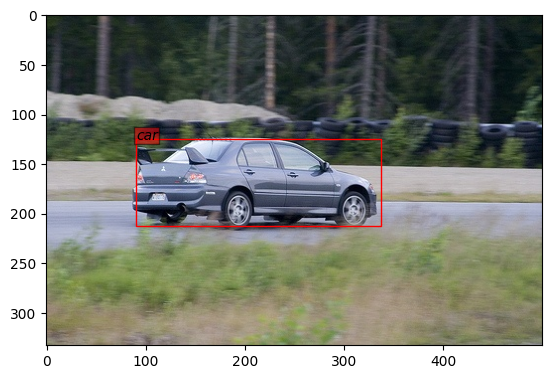

In [31]:
import matplotlib.image as mpimg
import matplotlib.patches as patches
from os import listdir, getcwd, path

objToInspect = 8

object = df.iloc[objToInspect]
print(object)
wd = getcwd()
parentDir = path.dirname(wd)
imgPath = '%s/Datasets/VOC2007_TrainVal/JPEGImages/%s.jpg' % (parentDir, object['imagename'])
print(imgPath)
img = mpimg.imread(imgPath)

fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)
df_boxes = df[df['imagename']==object['imagename']]
boxes = df_boxes[['class','xmin','xmax','ymin','ymax']].values.tolist()

for classname, xmin, xmax, ymin, ymax in boxes: 
    # Draw bounding box
    rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none')
    ax.text(xmin, ymin, classname, style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 1})
    ax.add_patch(rect)

imgplot = plt.show()


In [35]:
'''
from os import remove
wd = getcwd()
parentDir = path.dirname(wd)

images_path = "%s/Datasets/VOC2007_TrainVal/JPEGImages" % (parentDir)
annotations_path = "%s/Datasets/VOC2007_TrainVal/Annotations" % (parentDir)

images = df['imagename'].unique()

for folder_path in (images_path, annotations_path):
    # Get a list of all files in the folder
    all_files = listdir(folder_path)

    # Iterate over all files in the folder
    for file_name in all_files:
        # Check if the file name is not in the list of images to keep
        if file_name[:-4] not in images:  # Assuming file names are in the format "000012.jpg"
            # If not in the list, delete the file
            remove(path.join(folder_path, file_name))
            print(f"Removed {file_name} from the folder.")
'''

Removed 006279.jpg from the folder.
Removed 008254.jpg from the folder.
Removed 000608.jpg from the folder.
Removed 001270.jpg from the folder.
Removed 005016.jpg from the folder.
Removed 007615.jpg from the folder.
Removed 004452.jpg from the folder.
Removed 002745.jpg from the folder.
Removed 006523.jpg from the folder.
Removed 002989.jpg from the folder.
Removed 005980.jpg from the folder.
Removed 004446.jpg from the folder.
Removed 002037.jpg from the folder.
Removed 006251.jpg from the folder.
Removed 009162.jpg from the folder.
Removed 008297.jpg from the folder.
Removed 009189.jpg from the folder.
Removed 009823.jpg from the folder.
Removed 007826.jpg from the folder.
Removed 008730.jpg from the folder.
Removed 007365.jpg from the folder.
Removed 009348.jpg from the folder.
Removed 001714.jpg from the folder.
Removed 002209.jpg from the folder.
Removed 007417.jpg from the folder.
Removed 003671.jpg from the folder.
Removed 002547.jpg from the folder.
Removed 004644.jpg from the 

In [38]:
testdf = pd.read_csv("../VOCDevTest.csv", dtype={"imagename": str})
testdf

,imageset,imagename,imagewidth,imageheight,class,difficulty,pose,truncated,xmin,xmax,ymin,ymax
0,test,000001,353,500,dog,0,Left,1,48,195,240,371
1,test,000001,353,500,person,0,Left,1,8,352,12,498
2,test,000002,335,500,train,0,Unspecified,0,139,207,200,301
3,test,000003,500,375,sofa,0,Unspecified,0,123,215,155,195
4,test,000003,500,375,chair,0,Left,0,239,307,156,205
...,...,...,...,...,...,...,...,...,...,...,...,...
14971,test,009962,500,375,person,0,Unspecified,1,162,273,72,248
14972,test,009962,500,375,person,0,Right,1,250,473,68,312
14973,test,009962,500,375,person,0,Right,1,4,253,2,374
14974,test,009962,500,375,diningtable,1,Unspecified,1,358,500,216,375


In [39]:
desired_classes = ['person', 'car', 'bicycle', 'train', 'motorbike', 'bus']
testdf = testdf[testdf['class'].isin(desired_classes)]
testdf

,imageset,imagename,imagewidth,imageheight,class,difficulty,pose,truncated,xmin,xmax,ymin,ymax
1,test,000001,353,500,person,0,Left,1,8,352,12,498
2,test,000002,335,500,train,0,Unspecified,0,139,207,200,301
5,test,000004,500,406,car,0,Frontal,0,13,84,311,362
6,test,000004,500,406,car,0,Unspecified,1,362,500,330,389
7,test,000004,500,406,car,0,Unspecified,0,235,334,328,375
...,...,...,...,...,...,...,...,...,...,...,...,...
14969,test,009960,500,331,person,0,Unspecified,0,92,312,46,267
14971,test,009962,500,375,person,0,Unspecified,1,162,273,72,248
14972,test,009962,500,375,person,0,Right,1,250,473,68,312
14973,test,009962,500,375,person,0,Right,1,4,253,2,374


In [42]:
'''
from os import remove
wd = getcwd()
parentDir = path.dirname(wd)

images_path = "%s/Datasets/VOC2007_Test/JPEGImages" % (parentDir)
annotations_path = "%s/Datasets/VOC2007_Test/Annotations" % (parentDir)

images = testdf['imagename'].unique()

for folder_path in (images_path, annotations_path):
    # Get a list of all files in the folder
    all_files = listdir(folder_path)

    # Iterate over all files in the folder
    for file_name in all_files:
        # Check if the file name is not in the list of images to keep
        if file_name[:-4] not in images:  # Assuming file names are in the format "000012.jpg"
            # If not in the list, delete the file
            remove(path.join(folder_path, file_name))
            print(f"Removed {file_name} from the folder.")
'''

Removed 008532.jpg from the folder.
Removed 004308.jpg from the folder.
Removed 003467.jpg from the folder.
Removed 008240.jpg from the folder.
Removed 003315.jpg from the folder.
Removed 006245.jpg from the folder.
Removed 009176.jpg from the folder.
Removed 006537.jpg from the folder.
Removed 009604.jpg from the folder.
Removed 000813.jpg from the folder.
Removed 009837.jpg from the folder.
Removed 005957.jpg from the folder.
Removed 007198.jpg from the folder.
Removed 003498.jpg from the folder.
Removed 007832.jpg from the folder.
Removed 005943.jpg from the folder.
Removed 007403.jpg from the folder.
Removed 008056.jpg from the folder.
Removed 005572.jpg from the folder.
Removed 004678.jpg from the folder.
Removed 005200.jpg from the folder.
Removed 006721.jpg from the folder.
Removed 000350.jpg from the folder.
Removed 005228.jpg from the folder.
Removed 003881.jpg from the folder.
Removed 004888.jpg from the folder.
Removed 000436.jpg from the folder.
Removed 006053.jpg from the 